#Chapter 7

In [1]:
# The usual preamble
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Make the graphs a bit prettier, and bigger
pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

##Messy data

In [60]:
requests = pd.read_csv('data/311-service-requests.csv', parse_dates=['Created Date'])
requests[:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,2013-10-31 02:08:41,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027,197389,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,2013-10-31 02:01:04,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,58 PLACE,59 STREET,NaN,NaN,BLOCKFACE,MASPETH,NaN,Precinct,Open,10/31/2013 10:01:04 AM,NaN,05 QUEENS,QUEENS,1009349,201984,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,2013-10-31 02:00:24,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,WEST 171 STREET,WEST 172 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,10/31/2013 10:00:24 AM,10/31/2013 02:39:42 AM,12 MANHATTAN,MANHATTAN,1001088,246531,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,2013-10-31 01:56:23,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,COLUMBUS AVENUE,AMSTERDAM AVENUE,NaN,NaN,BLOCKFACE,NEW YORK,NaN,Precinct,Closed,10/31/2013 09:56:23 AM,10/31/2013 02:21:10 AM,07 MANHATTAN,MANHATTAN,989730,222727,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,2013-10-31 01:53:44,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,WEST 124 STREET,LENOX AVENUE,ADAM CLAYTON POWELL JR BOULEVARD,NaN,NaN,BLOCKFACE,NEW YORK,NaN,NaN,Pending,11/30/2013 01:53:44 AM,10/31/2013 01:59:54 AM,10 MANHATTAN,MANHATTAN,998815,233545,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


`.unique()` will list all values or histtogram (if numeric) of the object. However here there are problems since different types are mixed up and also presence of NaN.

In [5]:
requests['Incident Zip'].unique()

array([11432.0, 11378.0, 10032.0, 10023.0, 10027.0, 11372.0, 11419.0,
       11417.0, 10011.0, 11225.0, 11218.0, 10003.0, 10029.0, 10466.0,
       11219.0, 10025.0, 10310.0, 11236.0, nan, 10033.0, 11216.0, 10016.0,
       10305.0, 10312.0, 10026.0, 10309.0, 10036.0, 11433.0, 11235.0,
       11213.0, 11379.0, 11101.0, 10014.0, 11231.0, 11234.0, 10457.0,
       10459.0, 10465.0, 11207.0, 10002.0, 10034.0, 11233.0, 10453.0,
       10456.0, 10469.0, 11374.0, 11221.0, 11421.0, 11215.0, 10007.0,
       10019.0, 11205.0, 11418.0, 11369.0, 11249.0, 10005.0, 10009.0,
       11211.0, 11412.0, 10458.0, 11229.0, 10065.0, 10030.0, 11222.0,
       10024.0, 10013.0, 11420.0, 11365.0, 10012.0, 11214.0, 11212.0,
       10022.0, 11232.0, 11040.0, 11226.0, 10281.0, 11102.0, 11208.0,
       10001.0, 10472.0, 11414.0, 11223.0, 10040.0, 11220.0, 11373.0,
       11203.0, 11691.0, 11356.0, 10017.0, 10452.0, 10280.0, 11217.0,
       10031.0, 11201.0, 11358.0, 10128.0, 11423.0, 10039.0, 10010.0,
       11209.0,

## Fix NA, convert string/float format

Specify `na_value` and `dtype` in `.read_csv` method as follows:

In [9]:
na_values = ['NO CLUE', 'N/A', '0'] # based on observation of previous output I guess
requests = pd.read_csv('data/311-service-requests.csv', na_values=na_values, dtype={'Incident Zip': str})
requests['Incident Zip'].unique()

array(['11432', '11378', '10032', '10023', '10027', '11372', '11419',
       '11417', '10011', '11225', '11218', '10003', '10029', '10466',
       '11219', '10025', '10310', '11236', nan, '10033', '11216', '10016',
       '10305', '10312', '10026', '10309', '10036', '11433', '11235',
       '11213', '11379', '11101', '10014', '11231', '11234', '10457',
       '10459', '10465', '11207', '10002', '10034', '11233', '10453',
       '10456', '10469', '11374', '11221', '11421', '11215', '10007',
       '10019', '11205', '11418', '11369', '11249', '10005', '10009',
       '11211', '11412', '10458', '11229', '10065', '10030', '11222',
       '10024', '10013', '11420', '11365', '10012', '11214', '11212',
       '10022', '11232', '11040', '11226', '10281', '11102', '11208',
       '10001', '10472', '11414', '11223', '10040', '11220', '11373',
       '11203', '11691', '11356', '10017', '10452', '10280', '11217',
       '10031', '11201', '11358', '10128', '11423', '10039', '10010',
       '11209',

But still there are dashes...

##Taking care of dashes and long zip codes
Identify the 9-digit zip code and truncate it...

In [12]:
rows_with_dashes = requests['Incident Zip'].str.contains('-').fillna(False)
# .fillna(False) fills the na's with False.
len(requests[rows_with_dashes])

5

In [15]:
long_zip_codes = requests['Incident Zip'].str.len() > 5 # boolean vector
requests[long_zip_codes]['Incident Zip'].unique()

array(['77092-2016', '55164-0737', '000000', '11549-3650', '29616-0759',
       '35209-3114'], dtype=object)

In [16]:
requests['Incident Zip'] = requests['Incident Zip'].str.slice(0,5)

Take care of the '000000':

In [21]:
zero_zips = requests['Incident Zip'] == '00000'
requests.loc[zero_zips,'Incident Zip'] = np.nan  # avoid chaining indexing!!! 

In [22]:
unique_zips = requests['Incident Zip'].unique()
unique_zips.sort()
unique_zips

array([nan, '00083', '02061', '06901', '07020', '07087', '07093', '07109',
       '07114', '07201', '07208', '07306', '07604', '08807', '10000',
       '10001', '10002', '10003', '10004', '10005', '10006', '10007',
       '10009', '10010', '10011', '10012', '10013', '10014', '10016',
       '10017', '10018', '10019', '10020', '10021', '10022', '10023',
       '10024', '10025', '10026', '10027', '10028', '10029', '10030',
       '10031', '10032', '10033', '10034', '10035', '10036', '10037',
       '10038', '10039', '10040', '10044', '10048', '10065', '10069',
       '10075', '10103', '10107', '10112', '10119', '10128', '10129',
       '10153', '10162', '10280', '10281', '10282', '10301', '10302',
       '10303', '10304', '10305', '10306', '10307', '10308', '10309',
       '10310', '10312', '10314', '10451', '10452', '10453', '10454',
       '10455', '10456', '10457', '10458', '10459', '10460', '10461',
       '10462', '10463', '10464', '10465', '10466', '10467', '10468',
       '10469',

## Throw away the data that do not make sense...
Only keep zip codes that start with 0 and 1.

In [26]:
is_close = requests['Incident Zip'].str.startswith('0') | requests['Incident Zip'].str.startswith('1')
is_far = ~(is_close) &  requests['Incident Zip'].notnull()

In [27]:
requests['Incident Zip'][is_far]

12102    77056
13450    70711
29136    77092
30939    55164
44008    90010
47048    23541
57636    92123
71001    92123
71834    23502
80573    61702
85821    29616
89304    35209
94201    41042
Name: Incident Zip, dtype: object

In [31]:
requests[['Incident Zip', 'Descriptor', 'City']][is_far].sort('Incident Zip')

,Incident Zip,Descriptor,City
71834,23502,Harassment,NORFOLK
47048,23541,Harassment,NORFOLK
85821,29616,Debt Not Owed,GREENVILLE
89304,35209,Harassment,BIRMINGHAM
94201,41042,Harassment,FLORENCE
30939,55164,Harassment,ST. PAUL
80573,61702,Billing Dispute,BLOOMIGTON
13450,70711,Contract Dispute,CLIFTON
12102,77056,Debt Not Owed,HOUSTON
29136,77092,False Advertising,HOUSTON


##Some random application...

In [34]:
requests['City'].str.upper().value_counts()

BROOKLYN            31662
NEW YORK            22664
BRONX               18438
STATEN ISLAND        4766
JAMAICA              2246
FLUSHING             1803
ASTORIA              1568
RIDGEWOOD            1073
CORONA                707
OZONE PARK            693
LONG ISLAND CITY      678
FAR ROCKAWAY          652
ELMHURST              647
WOODSIDE              609
EAST ELMHURST         562
...
MELVILLE                  1
PORT JEFFERSON STATION    1
NORWELL                   1
EAST ROCKAWAY             1
BIRMINGHAM                1
ROSLYN                    1
LOS ANGELES               1
MINEOLA                   1
JERSEY CITY               1
ST. PAUL                  1
CLIFTON                   1
COL.ANVURES               1
EDGEWATER                 1
ROSELYN                   1
CENTRAL ISLIP             1
Length: 100, dtype: int64

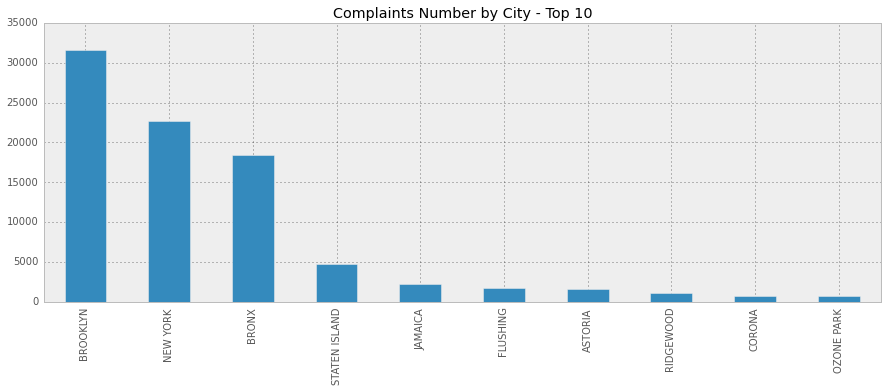

In [72]:
requests['City'].str.upper().value_counts()[:10].plot(kind='bar', title='Complaints Number by City - Top 10')

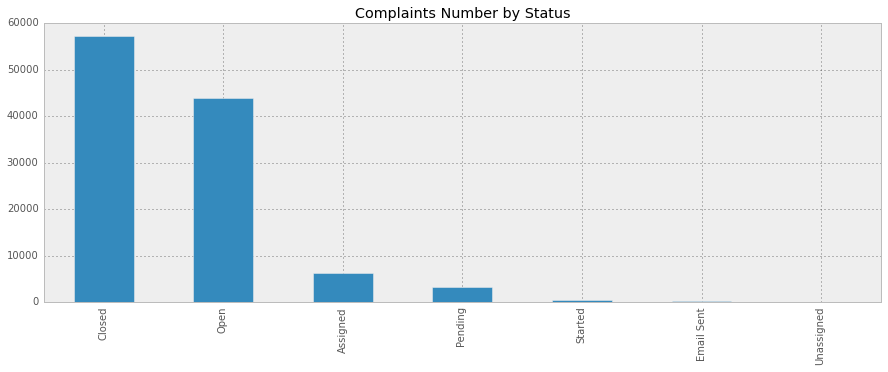

In [48]:
requests['Status'].value_counts().plot(kind='bar', title='Complaints Number by Status')

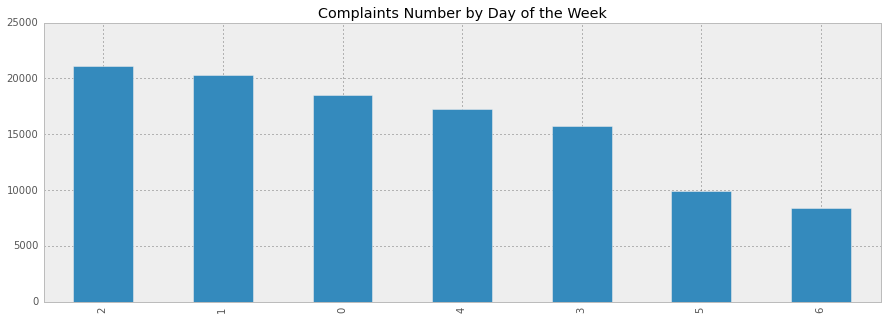

In [70]:
requests['Created Date'].dt.weekday.value_counts().plot(kind='bar', title='Complaints Number by Day of the Week')
# to use .dt.weekday, set parse_date when reading the csv...

##Cleaning the zip code - summary

In [35]:
# take care of all kinds of na's while reading data
na_values = ['NO CLUE', 'N/A', '0']
requests = pd.read_csv('data/311-service-requests.csv', 
                       na_values=na_values, 
                       dtype={'Incident Zip': str})

In [36]:
# function to filx long zips
def fix_zip_codes(zips):
    # Truncate everything to length 5 
    zips = zips.str.slice(0, 5)
    
    # Set 00000 to nan
    zero_zips = zips == '00000'
    zips[zero_zips] = np.nan
    
    return zips

In [38]:
requests['Incident Zip'] = fix_zip_codes(requests['Incident Zip'])
requests['Incident Zip'].unique()

array(['11432', '11378', '10032', '10023', '10027', '11372', '11419',
       '11417', '10011', '11225', '11218', '10003', '10029', '10466',
       '11219', '10025', '10310', '11236', nan, '10033', '11216', '10016',
       '10305', '10312', '10026', '10309', '10036', '11433', '11235',
       '11213', '11379', '11101', '10014', '11231', '11234', '10457',
       '10459', '10465', '11207', '10002', '10034', '11233', '10453',
       '10456', '10469', '11374', '11221', '11421', '11215', '10007',
       '10019', '11205', '11418', '11369', '11249', '10005', '10009',
       '11211', '11412', '10458', '11229', '10065', '10030', '11222',
       '10024', '10013', '11420', '11365', '10012', '11214', '11212',
       '10022', '11232', '11040', '11226', '10281', '11102', '11208',
       '10001', '10472', '11414', '11223', '10040', '11220', '11373',
       '11203', '11691', '11356', '10017', '10452', '10280', '11217',
       '10031', '11201', '11358', '10128', '11423', '10039', '10010',
       '11209',

##Summary
+ `.unique()` -- look at values  
+ `pd.read_csv('csv', na_values=na_values, dtype={'Incident Zip': str})` -- specify what to be read as na's, data type  
+ `.fillna()` -- fill Na's with specified value  
+ `.str.slice(0,5)` -- truncate string  
+ `.str.startswith(str, beg=0, end=len(string));` -- check if string starts with certain characters
+ `.notnull()` -- if na returns False
+ `requests[['Incident Zip', 'Descriptor', 'City']][is_far].sort('Incident Zip')` -- index using both labels and binary array, and sort by specified value  
+ `zero_zips = zips == '00000'` -- efficient  
+ `.dt.weekday/month/week/day` -- identify days, need to parse date